In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time


In [78]:
def dot_product_loop(X, y):
    rows, columns =  X.shape

    result = np.zeros((rows, 1))
    for r in range(rows):
        total = 0
        for c in range(columns):
            total += X[r,c]*y[c,0]
        result[r] = total
    
    return result
    

## Test that function works


In [82]:
X = np.random.rand(4,3)
y = np.random.rand(3,1)

print(X.dot(y))
print(dot_product_loop(X,y))


[[0.94823614]
 [0.32994976]
 [0.25111608]
 [0.94591243]]
[[0.94823614]
 [0.32994976]
 [0.25111608]
 [0.94591243]]


# Main Loop to Calculate Times for different size Matrices and Vectors

In [83]:
loop_times = list()
vec_times = list()
powers = list()
ms  = list()

for i in range(10, 20):
    powers.append(i)
    
    m = 2**i
    n = 100
    
    ms.append(m)
    
    X = np.random.rand(m,n)
    y = np.random.rand(n,1)

    s = time.time()
    z = X.dot(y)
    e = time.time()
    vec_times.append(e-s)
    print("Dot product for", m, "training points (vector product):", e-s)

    s = time.time()
    z2 = dot_product_loop(X,y)
    e = time.time()
    loop_times.append(e-s)

    print("Dot product for", m, "training points (loop product):", e-s)


Dot product for 1024 training points (vector product): 0.010540962219238281
Dot product for 1024 training points (loop product): 0.04362177848815918
Dot product for 2048 training points (vector product): 0.0006127357482910156
Dot product for 2048 training points (loop product): 0.05869913101196289
Dot product for 4096 training points (vector product): 6.103515625e-05
Dot product for 4096 training points (loop product): 0.12294912338256836
Dot product for 8192 training points (vector product): 0.004980802536010742
Dot product for 8192 training points (loop product): 0.2007598876953125
Dot product for 16384 training points (vector product): 0.0002307891845703125
Dot product for 16384 training points (loop product): 0.4123969078063965
Dot product for 32768 training points (vector product): 0.001622915267944336
Dot product for 32768 training points (loop product): 0.7850861549377441
Dot product for 65536 training points (vector product): 0.005500316619873047
Dot product for 65536 training 

# Plotting Timing Results

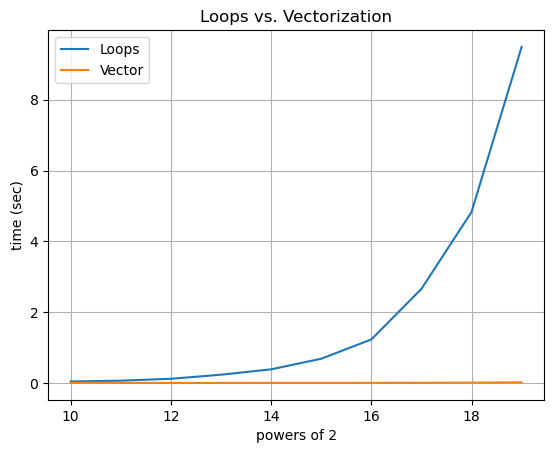

In [74]:

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)
fig, ax = plt.subplots() 

ax.plot(powers, loop_times, label="Loops")
ax.plot(powers, vec_times, label="Vector")
ax.legend()

ax.set(xlabel='powers of 2', ylabel='time (sec)',
       title='Loops vs. Vectorization')
ax.grid()